# Assignment: NYC High School Enrollment

New York City has one of the largest public school programs in the world. In this assignment, we will explore and visualize the enrollment data of NYC high schools.

## Data:

This assignment involves 3 datasets:

* [School district](https://data.cityofnewyork.us/Education/School-Districts/r8nu-ymqj): This dataset provides the geospatial data about the school districts.
* [2021 DOE high school directory](https://data.cityofnewyork.us/Education/2021-DOE-High-School-Directory/8b6c-7uty): This dataset provides detailed information about each high school. In particular, the "location" column contains the longitude and latitude coordinates of each school.
* [2020-2021 school quality reports - high school](https://infohub.nyced.org/reports/students-and-schools/school-quality/school-quality-reports-and-resources/school-quality-report-citywide-data): This dataset provides many quality measurement results. We are interested in the "enrollment" data.

In the last two datasets, each school is identified by the column DBN, which stands for District Borough Number. [This page](https://teachnyc.zendesk.com/hc/en-us/articles/360053601831-What-is-a-DBN-District-Borough-Number-) provides a detailed explanation of DBN. DBN is an important column that allows us to connect data across different datasets.

## Task:

Your task for this assignment is to create a single visualization that visualizing the following information on a map:

* The total number of high school students enrolled in each school district using choropleth map.
* The location of the 20 largest high schools measured by enrollment (as dots on the map).
* The enrollment size of the 20 largest high schools (as radius of the dots).

## Submit:

Please use the provided Jupyter notebook for this assingment. Submit the completed Jupyter notebook as well as the resulting visualization (as .png, .html or .svg file).

In [36]:
import altair as alt
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Retrieving the data

school_district = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/r8nu-ymqj?method=export&format=GeoJSON")
school_directory = pd.read_csv("https://data.cityofnewyork.us/api/views/8b6c-7uty/rows.csv?accessType=DOWNLOAD")
school_quality = pd.read_excel("https://github.com/user-attachments/files/17283895/202021-hs-sqr-results.xlsx", skiprows=[0, 1, 2, 4])
school_quality = school_quality[['DBN', 'School Name', 'Enrollment']]

In [37]:
school_district.head()

,school_dist,shape_area,shape_leng,geometry
0,18,175191726.482,120925.187236,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
1,3,113412690.636,51922.3285231,"MULTIPOLYGON (((-73.95672 40.7866, -73.95716 4..."
2,13,104871083.068,86649.0963736,"MULTIPOLYGON (((-73.97906 40.70595, -73.97924 ..."
3,16,46763798.9402,35848.9081061,"MULTIPOLYGON (((-73.93312 40.69579, -73.93237 ..."
4,32,51898318.061,37251.0606877,"MULTIPOLYGON (((-73.91181 40.70343, -73.9129 4..."


In [38]:
school_directory.head()

,dbn,school_name,borocode,url,overview_paragraph,diversity_in_admissions,diadetails,school_10th_seats,academicopportunities1,academicopportunities2,...,state_code,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,01M292,Orchard Collegiate Academy,M,https://www.myschools.nyc/en/schools/high-scho...,Orchard Collegiate Academy (OCA) is a supporti...,NaN,NaN,Y,"Ninth grade literacy block, science bridge ele...","Enrichment elective courses: debate, technolog...",...,NY,MANHATTAN,40.713684,-73.986336,103,1,201,1003223,1002690041,Lower East Side
1,01M448,University Neighborhood High School,M,https://www.myschools.nyc/en/schools/high-scho...,UNHS is an Early College High School that offe...,NaN,NaN,Y,Early College Program Offers 30 FREE College C...,20 College Credit Earning Courses Offered on C...,...,NY,MANHATTAN,40.712399,-73.984497,103,1,202,1003214,1002590044,Lower East Side
2,01M450,East Side Community School,M,https://www.myschools.nyc/en/schools/high-scho...,We are a small college preparatory school that...,1.0,Priority to applicants eligible for free or re...,Y,All students develop graduation portfolios in ...,In addition to several AP & College Prep class...,...,NY,MANHATTAN,40.729589,-73.982555,103,2,34,1005974,1004390017,East Village
3,01M458,Forsyth Satellite Academy,M,https://www.myschools.nyc/en/schools/high-scho...,Forsyth Satellite High School serves entering ...,NaN,NaN,NaN,Students are exempt from Regents exams. Instea...,Classes are designed to maximize peer to peer ...,...,NY,MANHATTAN,40.722520,-73.990728,103,1,3601,1005626,1004220072,Chinatown
4,01M539,"New Explorations into Science, Technology and ...",M,https://www.myschools.nyc/en/schools/high-scho...,NEST+m is a Citywide G&T K-12 school. Our acad...,NaN,NaN,Y,"Minds Matter, SEO Scholars, POSSE Scholarship,...",Wide array of Advanced Placement College-Level...,...,NY,MANHATTAN,40.718895,-73.979308,103,2,2201,1004070,1003350001,Lower East Side


In [39]:
school_quality.head()

,DBN,School Name,Enrollment
0,01M292,Orchard Collegiate Academy,296
1,01M448,University Neighborhood High School,570
2,01M450,East Side Community School,377
3,01M539,"New Explorations into Science, Technology and ...",664
4,01M696,Bard High School Early College,636


In [40]:
# Rename DBN in school_quality 
school_directory.rename(columns={'dbn': 'DBN'}, inplace=True)
school_directory.head()

,DBN,school_name,borocode,url,overview_paragraph,diversity_in_admissions,diadetails,school_10th_seats,academicopportunities1,academicopportunities2,...,state_code,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,01M292,Orchard Collegiate Academy,M,https://www.myschools.nyc/en/schools/high-scho...,Orchard Collegiate Academy (OCA) is a supporti...,NaN,NaN,Y,"Ninth grade literacy block, science bridge ele...","Enrichment elective courses: debate, technolog...",...,NY,MANHATTAN,40.713684,-73.986336,103,1,201,1003223,1002690041,Lower East Side
1,01M448,University Neighborhood High School,M,https://www.myschools.nyc/en/schools/high-scho...,UNHS is an Early College High School that offe...,NaN,NaN,Y,Early College Program Offers 30 FREE College C...,20 College Credit Earning Courses Offered on C...,...,NY,MANHATTAN,40.712399,-73.984497,103,1,202,1003214,1002590044,Lower East Side
2,01M450,East Side Community School,M,https://www.myschools.nyc/en/schools/high-scho...,We are a small college preparatory school that...,1.0,Priority to applicants eligible for free or re...,Y,All students develop graduation portfolios in ...,In addition to several AP & College Prep class...,...,NY,MANHATTAN,40.729589,-73.982555,103,2,34,1005974,1004390017,East Village
3,01M458,Forsyth Satellite Academy,M,https://www.myschools.nyc/en/schools/high-scho...,Forsyth Satellite High School serves entering ...,NaN,NaN,NaN,Students are exempt from Regents exams. Instea...,Classes are designed to maximize peer to peer ...,...,NY,MANHATTAN,40.722520,-73.990728,103,1,3601,1005626,1004220072,Chinatown
4,01M539,"New Explorations into Science, Technology and ...",M,https://www.myschools.nyc/en/schools/high-scho...,NEST+m is a Citywide G&T K-12 school. Our acad...,NaN,NaN,Y,"Minds Matter, SEO Scholars, POSSE Scholarship,...",Wide array of Advanced Placement College-Level...,...,NY,MANHATTAN,40.718895,-73.979308,103,2,2201,1004070,1003350001,Lower East Side


In [41]:
# Merge using DBN
merged_data = pd.merge(school_directory[['DBN', 'school_name', 'Latitude', 'Longitude']], 
                       school_quality[['DBN', 'Enrollment']], 
                       on='DBN', 
                       how='inner')
merged_data.head()

,DBN,school_name,Latitude,Longitude,Enrollment
0,01M292,Orchard Collegiate Academy,40.713684,-73.986336,296
1,01M448,University Neighborhood High School,40.712399,-73.984497,570
2,01M450,East Side Community School,40.729589,-73.982555,377
3,01M539,"New Explorations into Science, Technology and ...",40.718895,-73.979308,664
4,01M696,Bard High School Early College,40.719029,-73.975891,636


In [42]:
# Extract school district
merged_data['school_district'] = merged_data['DBN'].str[:2]
merged_data.head()

,DBN,school_name,Latitude,Longitude,Enrollment,school_district
0,01M292,Orchard Collegiate Academy,40.713684,-73.986336,296,01
1,01M448,University Neighborhood High School,40.712399,-73.984497,570,01
2,01M450,East Side Community School,40.729589,-73.982555,377,01
3,01M539,"New Explorations into Science, Technology and ...",40.718895,-73.979308,664,01
4,01M696,Bard High School Early College,40.719029,-73.975891,636,01


In [43]:
# Aggregate total enrollment grouped by school district
district_enrollment = merged_data.groupby('school_district')['Enrollment'].sum().reset_index()
district_enrollment.head()

,school_district,Enrollment
0,01,2543
1,02,31462
2,03,8287
3,04,3487
4,05,3063


In [44]:
# Merge with the geospatial data from the school_districts dataset
school_district = school_district.merge(district_enrollment, left_on='school_dist', right_on='school_district', how='left')

In [45]:
school_district.head()

,school_dist,shape_area,shape_leng,geometry,school_district,Enrollment
0,18,175191726.482,120925.187236,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",18,2901.0
1,3,113412690.636,51922.3285231,"MULTIPOLYGON (((-73.95672 40.7866, -73.95716 4...",NaN,NaN
2,13,104871083.068,86649.0963736,"MULTIPOLYGON (((-73.97906 40.70595, -73.97924 ...",13,11198.0
3,16,46763798.9402,35848.9081061,"MULTIPOLYGON (((-73.93312 40.69579, -73.93237 ...",16,1386.0
4,32,51898318.061,37251.0606877,"MULTIPOLYGON (((-73.91181 40.70343, -73.9129 4...",32,2382.0


In [46]:
# Find the top 20
top_20_schools = merged_data.nlargest(20, 'Enrollment')
top_20_schools

,DBN,school_name,Latitude,Longitude,Enrollment,school_district
217,13K430,Brooklyn Technical High School,40.688834,-73.976905,5917,13
298,20K490,Fort Hamilton High School,40.627898,-74.039985,4678,20
348,26Q430,Francis Lewis High School,40.740724,-73.792830,4424,26
312,22K405,Midwood High School,40.633237,-73.952929,4109,22
313,22K425,James Madison High School,40.609912,-73.948512,3851,22
372,28Q440,Forest Hills High School,40.729402,-73.845637,3775,28
408,31R455,Tottenville High School,40.528092,-74.192032,3726,31
306,21K525,Edward R. Murrow High School,40.620525,-73.959285,3691,21
296,20K445,New Utrecht High School,40.613262,-74.003404,3572,20
347,26Q415,Benjamin N. Cardozo High School,40.752333,-73.755990,3405,26


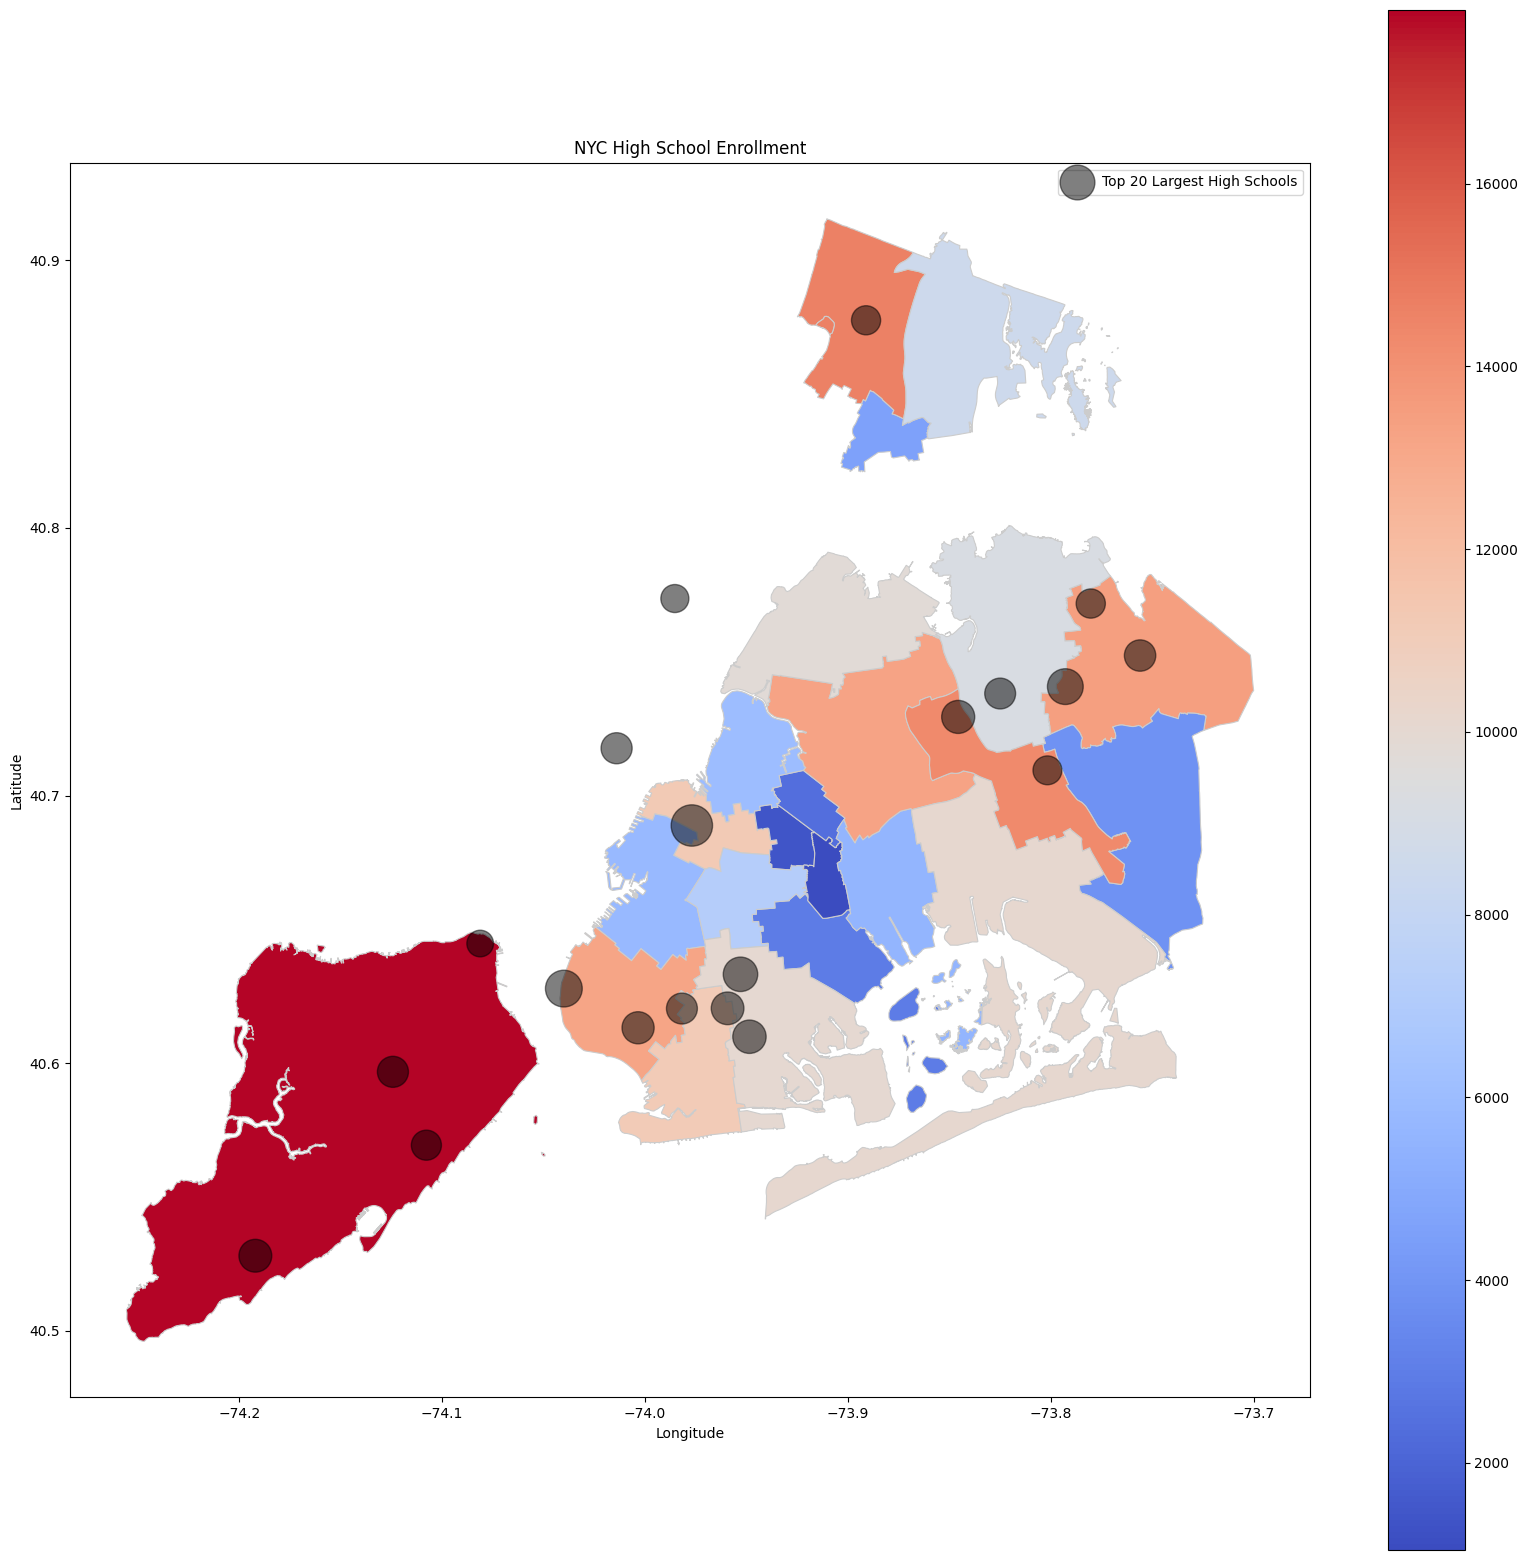

In [65]:
# Plot districts colored by total enrollment
fig, ax = plt.subplots(figsize=(20, 20))
school_district.plot(column='Enrollment', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot the 20 largest high schools as points
ax.scatter(
    top_20_schools['Longitude'], 
    top_20_schools['Latitude'],
    s=top_20_schools['Enrollment'] * 0.15,  # Scale circle size based on enrollment
    color='black', 
    alpha=0.5, 
    edgecolor='black', 
    label='Top 20 Largest High Schools'
)

# Add a title and labels
plt.title('NYC High School Enrollment')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Show the plot
plt.show()

# Save the plot as a PNG
fig.savefig('nyc_high_school_enrollment.png', dpi=300)